In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init() # H2Oサーバーの初期化

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "23" 2024-09-17; OpenJDK Runtime Environment Homebrew (build 23); OpenJDK 64-Bit Server VM Homebrew (build 23, mixed mode, sharing)
  Starting server from /Users/inaba/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/f_/xqd5v1yx5hz24_b4qnxynvhw0000gn/T/tmp_sob04lb
  JVM stdout: /var/folders/f_/xqd5v1yx5hz24_b4qnxynvhw0000gn/T/tmp_sob04lb/h2o_inaba_started_from_python.out
  JVM stderr: /var/folders/f_/xqd5v1yx5hz24_b4qnxynvhw0000gn/T/tmp_sob04lb/h2o_inaba_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_inaba_pmug4e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.48 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [3]:
data = h2o.import_file('EDA_Universal_100.csv')

# トレーニングデータとテストデータに分割
train, test = data.split_frame(ratios=[0.8])

data

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


moving_C_rate_var,moving_rich_area_C_rate_var,moving_poor_area_C_rate_var,moving_std_degree_var,moving_nodes_above_8_var,moving_nodes_above_10_var,prior_C_rate,prior_rich_C_rate,prior_poor_C_rate,mean_C_rate,mean_rich_C_rate,mean_poor_C_rate,mean_std_degree,mean_hub8_count,mean_hub10_count,resource_limit_var,mean_resource_limit
-0.0842857,-0.0842857,-0.0842857,0.176477,2.7619,0.285714,0.16,0.12,0.12,0.159802,0.115644,0.167129,1.97585,5.9802,1.0495,0.0701668,0.592901
-0.0904762,-0.0904762,-0.0904762,0.176677,2.85714,0.380952,0.16,0.12,0.08,0.159406,0.115248,0.167525,1.9759,5.9901,1.0495,0.0649288,0.591675
-0.0933333,-0.0933333,-0.0933333,0.177106,3,0.47619,0.18,0.16,0.16,0.158812,0.114851,0.167129,1.97303,6.0099,1.0297,0.0703355,0.588476
-0.0971429,-0.0971429,-0.0971429,0.177664,2.95238,0.571429,0.21,0.16,0.2,0.158218,0.114059,0.166733,1.97494,6.05941,1.0396,0.0710288,0.584273
-0.101905,-0.101905,-0.101905,0.14152,2.71429,0.571429,0.23,0.16,0.2,0.157228,0.113267,0.166337,1.97546,6.06931,1.0297,0.0672767,0.581991
-0.106667,-0.106667,-0.106667,0.131388,2.61905,0.619048,0.27,0.16,0.28,0.156238,0.112475,0.165941,1.97587,6.08911,1.0396,0.0688128,0.581118
-0.109048,-0.109048,-0.109048,0.114673,2.28571,0.666667,0.3,0.16,0.32,0.154653,0.111683,0.164356,1.97879,6.14851,1.07921,0.0727371,0.578755
-0.11619,-0.11619,-0.11619,0.118651,2.2381,0.714286,0.29,0.16,0.32,0.152871,0.110891,0.162772,1.97897,6.17822,1.07921,0.0736557,0.576266
-0.124762,-0.124762,-0.124762,0.141108,2.14286,0.952381,0.29,0.16,0.36,0.151089,0.110099,0.160396,1.97776,6.17822,1.06931,0.0809304,0.576063
-0.131429,-0.131429,-0.131429,0.154411,2.19048,1,0.26,0.16,0.28,0.149208,0.109307,0.15802,1.97882,6.20792,1.05941,0.08594,0.575489


In [4]:
data.columns

['moving_C_rate_var',
 'moving_rich_area_C_rate_var',
 'moving_poor_area_C_rate_var',
 'moving_std_degree_var',
 'moving_nodes_above_8_var',
 'moving_nodes_above_10_var',
 'prior_C_rate',
 'prior_rich_C_rate',
 'prior_poor_C_rate',
 'mean_C_rate',
 'mean_rich_C_rate',
 'mean_poor_C_rate',
 'mean_std_degree',
 'mean_hub8_count',
 'mean_hub10_count',
 'resource_limit_var',
 'mean_resource_limit']

target: moving_C_rate_var
features: ['mean_C_rate', 'mean_rich_C_rate', 'mean_poor_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'resource_limit_var', 'mean_resource_limit']
AutoML progress: |
18:38:03.740: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                           rmse          mse        mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20240924_183803_model_29  0.0242306  0.000587123  0.0146946  0.0253405               0.000587123
GBM_grid_1_AutoML_1_20240924_183803_model_18  0.0243863  0.000594694  0.0150494  0.0253741               0.000594694
GBM_grid_1_AutoML_1_20240924_183803_model_62  0.0246716  0.000608687  0.0142656  0.0257102               0.000608687
GBM_grid_1_AutoML_1_20240924_183803_model_65  0.0248289  0.000616473  0.0144548  0.025851                0.000616473
GBM_grid_1_AutoML_1_20240924_183803_model_63  0.0254237  0.000

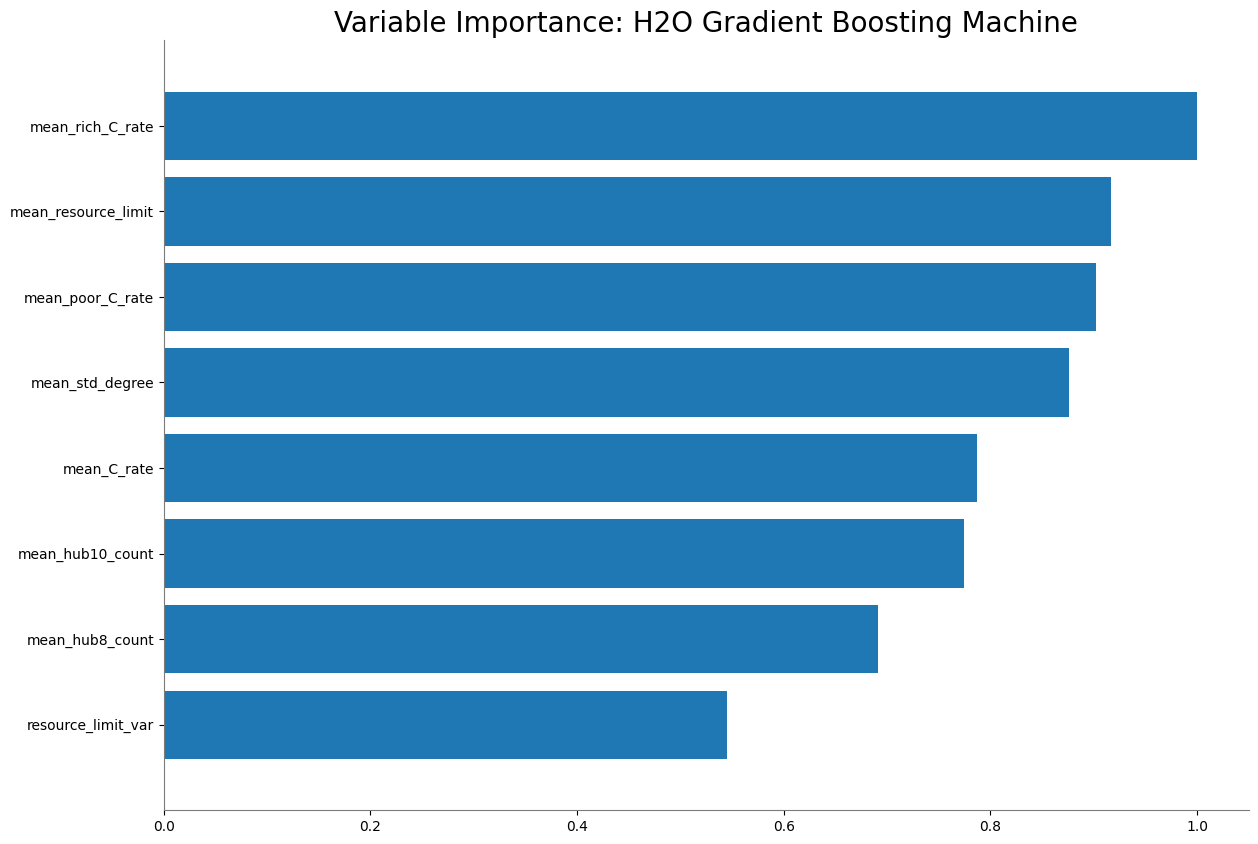

target: moving_rich_area_C_rate_var
features: ['mean_C_rate', 'mean_rich_C_rate', 'mean_poor_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'resource_limit_var', 'mean_resource_limit']
AutoML progress: |
18:48:05.927: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                           rmse          mse        mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_3_20240924_184805_model_8   0.0241309  0.0005823    0.0152757  0.0249904               0.0005823
GBM_grid_1_AutoML_3_20240924_184805_model_44  0.0246812  0.00060916   0.0135951  0.0256355               0.00060916
GBM_grid_1_AutoML_3_20240924_184805_model_21  0.0249066  0.00062034   0.0155995  0.0260789               0.00062034
GBM_grid_1_AutoML_3_20240924_184805_model_32  0.0260231  0.000677202  0.0171431  0.0270074               0.000677202
GBM_grid_1_AutoML_3_20240924_184805_model_16  0.0261869 

<Figure size 640x480 with 0 Axes>

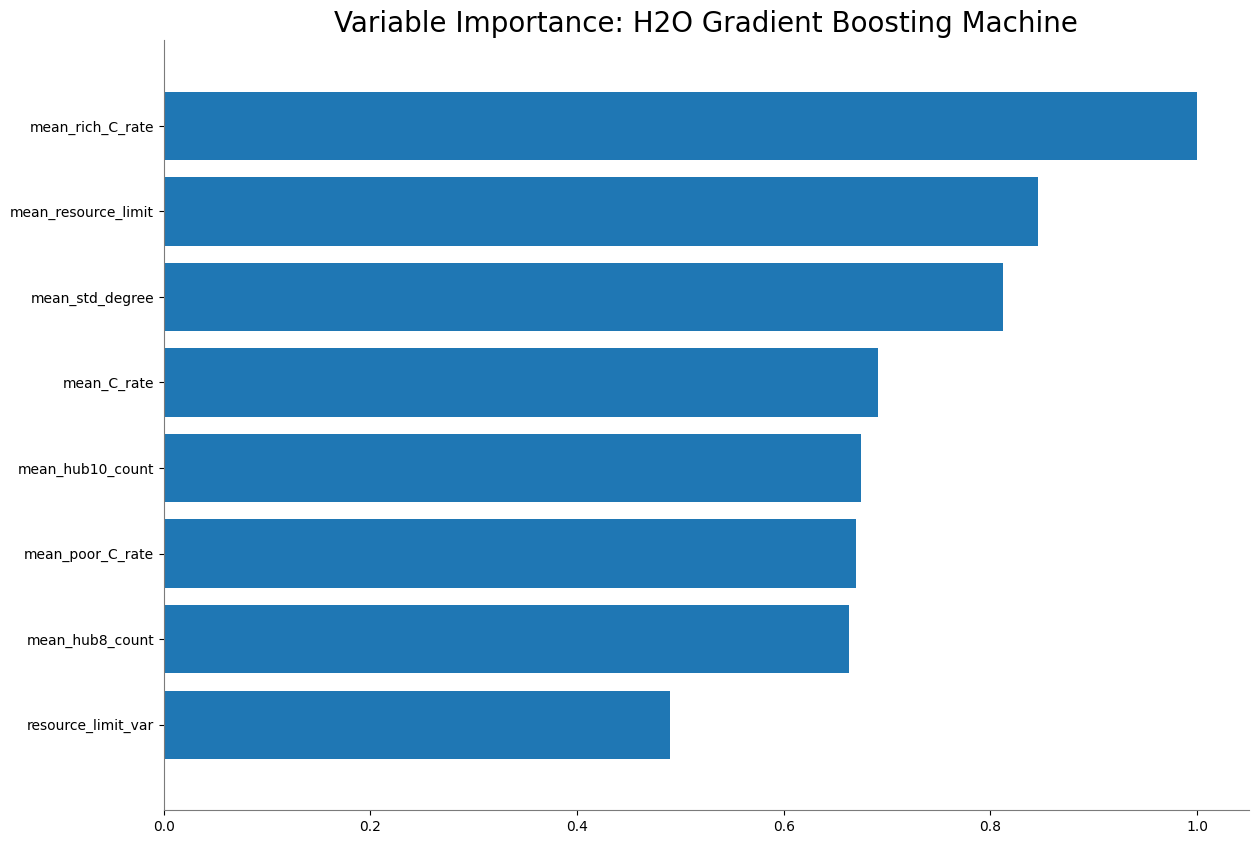

target: moving_poor_area_C_rate_var
features: ['mean_C_rate', 'mean_rich_C_rate', 'mean_poor_C_rate', 'mean_std_degree', 'mean_hub8_count', 'mean_hub10_count', 'resource_limit_var', 'mean_resource_limit']
AutoML progress: |
18:58:07.413: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                           rmse          mse        mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_5_20240924_185807_model_8   0.024243   0.000587722  0.0148867  0.0252566               0.000587722
GBM_4_AutoML_5_20240924_185807                0.0265146  0.000703024  0.0163577  0.027725                0.000703024
GBM_grid_1_AutoML_5_20240924_185807_model_9   0.0270694  0.00073275   0.0172028  0.0282476               0.00073275
GBM_grid_1_AutoML_5_20240924_185807_model_13  0.0272817  0.000744289  0.0166298  0.028396                0.000744289
GBM_3_AutoML_5_20240924_185807                0.02791

<Figure size 640x480 with 0 Axes>

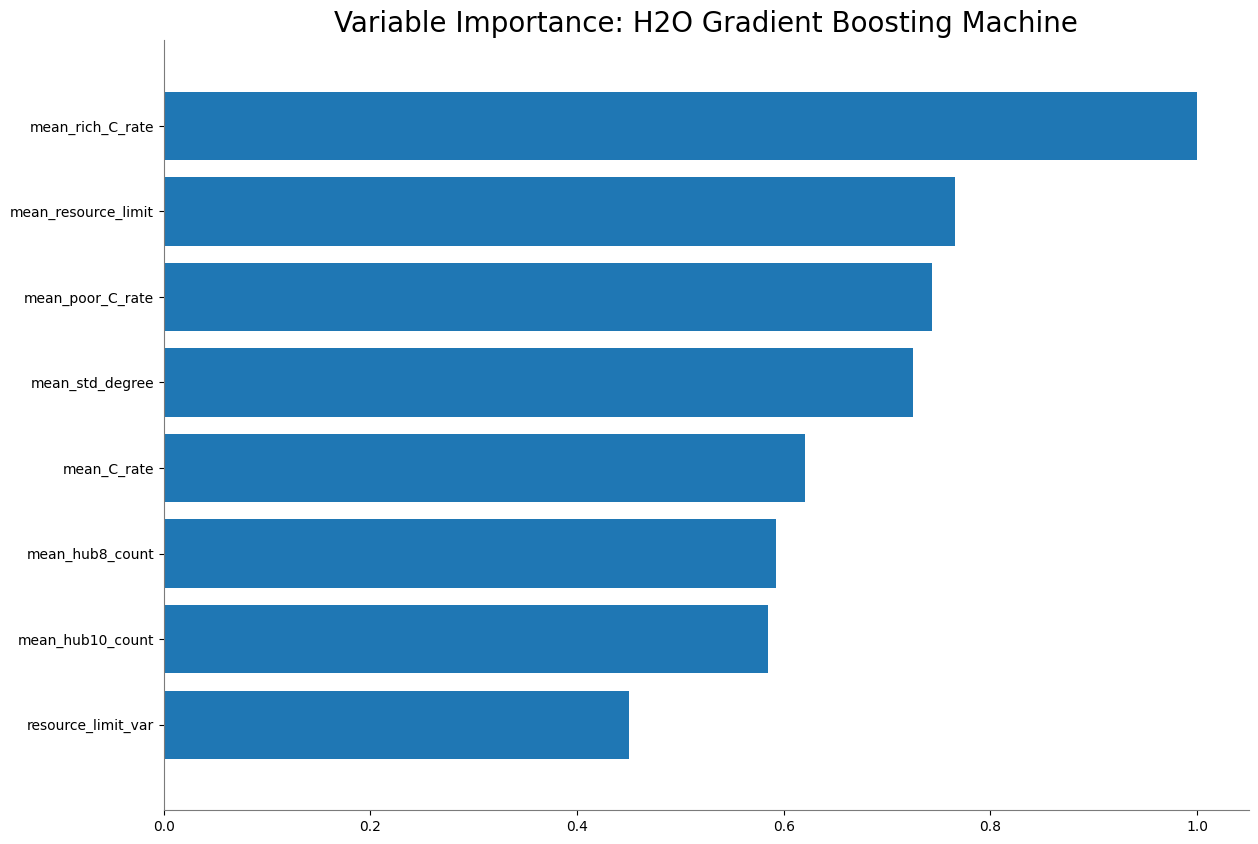

<Figure size 640x480 with 0 Axes>

In [5]:
# 目的変数・説明変数の指定
target_vec = [
    'moving_C_rate_var',
    'moving_rich_area_C_rate_var',
    'moving_poor_area_C_rate_var',
]
features_vec = [
    [
        'mean_C_rate',
        'mean_rich_C_rate',
        'mean_poor_C_rate',
        'mean_std_degree',
        'mean_hub8_count',
        'mean_hub10_count',
        'resource_limit_var',
        'mean_resource_limit'
    ],
]
model_list = []

for target in target_vec:
    for features in features_vec:
        print(f"target: {target}")
        print(f"features: {features}")

        # H2O AutoMLの設定
        aml = H2OAutoML(max_runtime_secs=600, exclude_algos=["StackedEnsemble"])

        # AutoMLの実行
        aml.train(x=features, y=target, training_frame=train)

        # リーダーボードの表示
        lb = aml.leaderboard
        print(lb)
        
        # 最適なモデルの取得
        best_model = aml.leader
        model_list.append(best_model)

        # テストデータでの評価
        perf = best_model.model_performance(test)
        print(perf)
        print(f"r^2: {perf.r2()}")

        # 変数重要度をプロット
        best_model.varimp_plot()

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


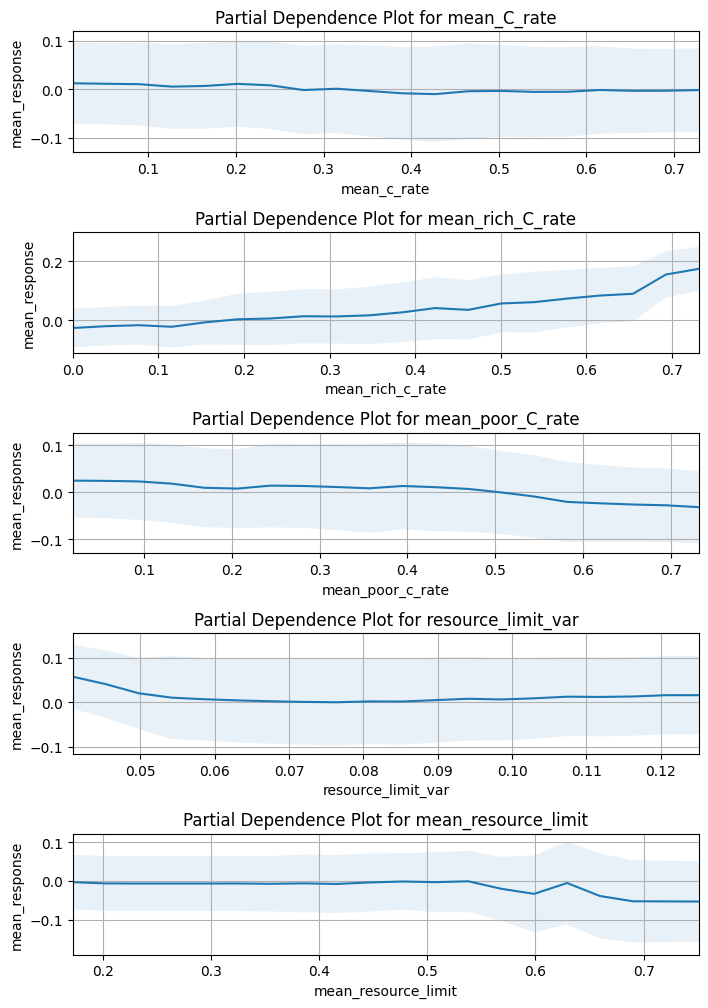

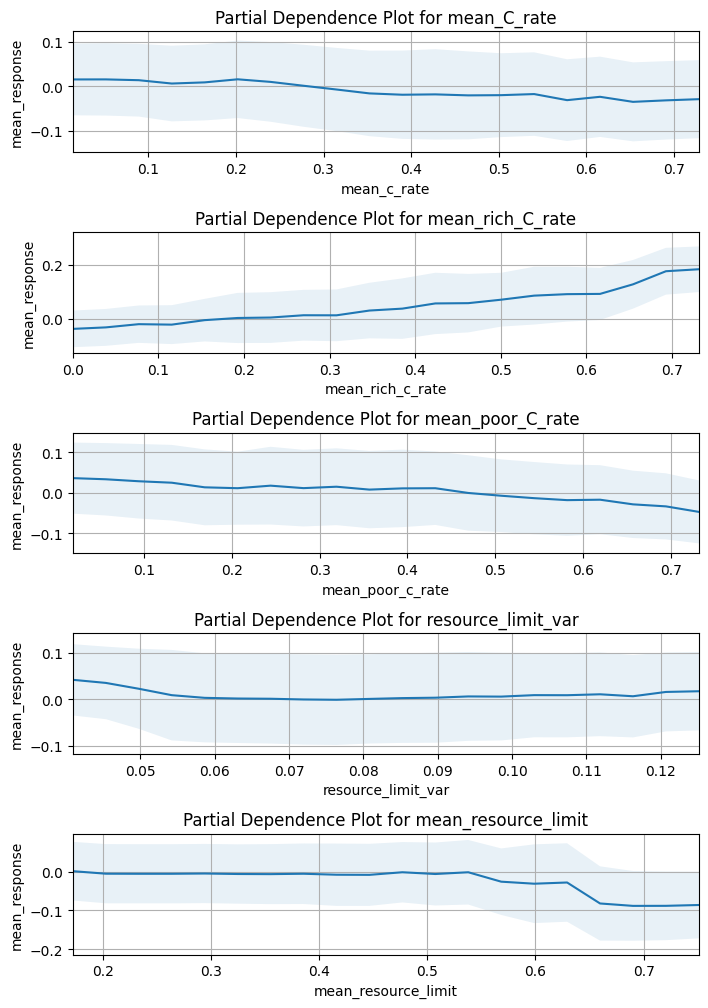

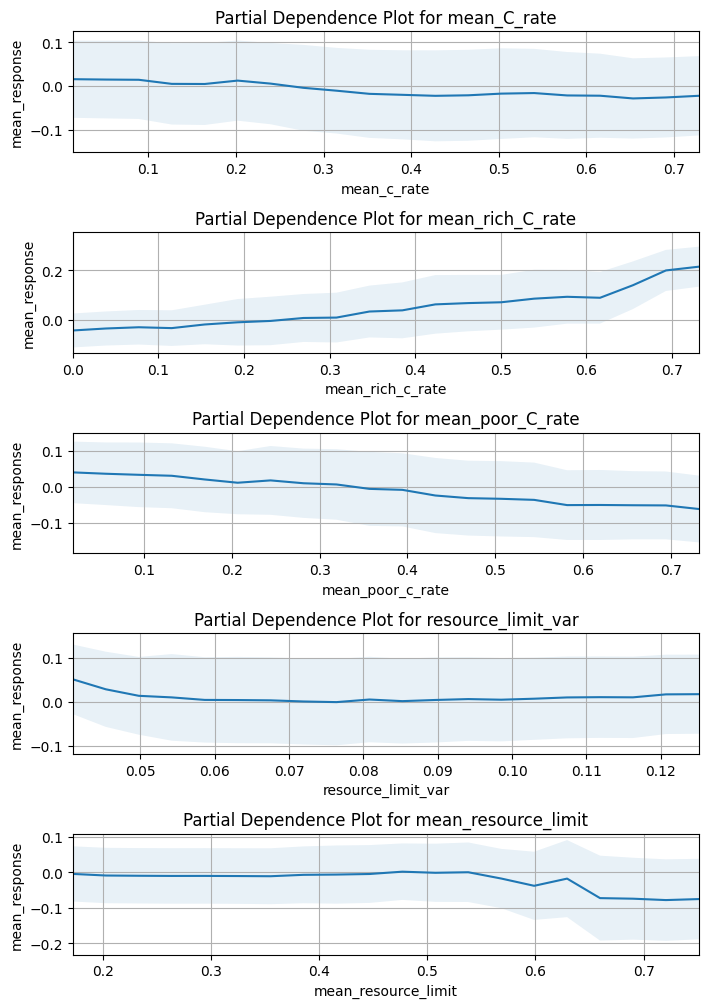

In [6]:
partial_plot_columns = ['mean_C_rate', 'mean_rich_C_rate', 'mean_poor_C_rate', 'resource_limit_var', 'mean_resource_limit']

for model in model_list:
    model.partial_plot(frame=test, cols=partial_plot_columns, plot=True)